# FENE beadspring experiment data analysis

In [1]:
import os

import polyflexmd.data_analysis.data.read as read
import polyflexmd.data_analysis.transform.transform as transform
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from pandarallel import pandarallel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pandarallel.initialize(
    nb_workers=24,
    progress_bar=False,
    use_memory_fs=False
)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Read data

In [5]:
PATH_EXPERIMENT = "/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring/1-FENE-beadspring-large/25b0750c"

In [6]:
PATH_EXPERIMENT = pathlib.Path(PATH_EXPERIMENT)

PATHS_TRAJECTORIES = [
    PATH_EXPERIMENT / "data/polymer_relax.out",
    PATH_EXPERIMENT / "data/polymer.out",
]

PATH_SYSTEM_DEF = PATH_EXPERIMENT / "data/initial_system.data"

### Trajectory df

In [7]:
df_trajectory_raw = read.read_multiple_raw_trajectory_dfs(PATHS_TRAJECTORIES)
df_trajectory_raw

,t,id,type,x,y,z,ix,iy,iz
0,0,1,1,0.000000,0.000000,0.000000,0,0,0
1,0,2,1,0.025162,0.053709,0.968185,0,0,0
2,0,3,2,-0.692949,0.222687,0.338374,0,0,0
3,0,4,2,-1.542670,0.688412,0.382767,0,0,0
4,0,5,2,-0.576559,0.766162,0.421240,0,0,0
...,...,...,...,...,...,...,...,...,...
15355,45000000,15356,2,-9.047170,0.219278,42.958200,0,0,0
15356,45000000,15357,2,-8.576280,0.283498,42.094800,0,0,0
15357,45000000,15358,2,-8.806360,0.842174,41.350800,0,0,0
15358,45000000,15359,2,-8.760710,1.604040,40.745900,0,0,0


### System def

In [8]:
system = read.read_lammps_system_data(PATH_SYSTEM_DEF)
system.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,0.025162,0.053709,0.968185,0,0,0
3,1,2,-0.692949,0.222687,0.338374,0,0,0
4,1,2,-1.542672,0.688412,0.382767,0,0,0
5,1,2,-0.576559,0.766162,0.421240,0,0,0
...,...,...,...,...,...,...,...,...
15356,120,2,3.869787,-2.877719,-5.676510,0,0,0
15357,120,2,3.965340,-2.450716,-4.810809,0,0,0
15358,120,2,4.005728,-3.367979,-4.497924,0,0,0
15359,120,2,3.981972,-3.416365,-5.466425,0,0,0


In [9]:
system.bonds

,type,atom1,atom2
1,1,1,2
2,1,2,3
3,1,3,4
4,1,4,5
5,1,5,6
...,...,...,...
15236,1,15355,15356
15237,1,15356,15357
15238,1,15357,15358
15239,1,15358,15359


In [10]:
system.angles

,type,atom1,atom2,atom3
1,1,1,2,3
2,1,2,3,4
3,1,3,4,5
4,1,4,5,6
5,1,5,6,7
...,...,...,...,...
15116,1,15354,15355,15356
15117,1,15355,15356,15357
15118,1,15356,15357,15358
15119,1,15357,15358,15359


In [11]:
system.box

-100.000000 100.000000  xlo xhi
-100.000000 100.000000  ylo yhi
-100.000000 100.000000  zlo zhi

## Process data

Join molecule id information

In [14]:
df_trajectory = transform.join_raw_trajectory_df_with_system_data(
    df_trajectory_raw, system
)
df_trajectory

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,0.025162,0.053709,0.968185,0,0,0,1
2,0,3,2,-0.692949,0.222687,0.338374,0,0,0,1
3,0,4,2,-1.542670,0.688412,0.382767,0,0,0,1
4,0,5,2,-0.576559,0.766162,0.421240,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15355,45000000,15356,2,-9.047170,0.219278,42.958200,0,0,0,120
15356,45000000,15357,2,-8.576280,0.283498,42.094800,0,0,0,120
15357,45000000,15358,2,-8.806360,0.842174,41.350800,0,0,0,120
15358,45000000,15359,2,-8.760710,1.604040,40.745900,0,0,0,120


Unfold coordinates

In [15]:
df_trajectory_unfolded = transform.unfold_coordinates_df(df_trajectory, system)
df_trajectory_unfolded

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,0.025162,0.053709,0.968185,0,0,0,1
2,0,3,2,-0.692949,0.222687,0.338374,0,0,0,1
3,0,4,2,-1.542670,0.688412,0.382767,0,0,0,1
4,0,5,2,-0.576559,0.766162,0.421240,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15355,45000000,15356,2,-9.047170,0.219278,42.958200,0,0,0,120
15356,45000000,15357,2,-8.576280,0.283498,42.094800,0,0,0,120
15357,45000000,15358,2,-8.806360,0.842174,41.350800,0,0,0,120
15358,45000000,15359,2,-8.760710,1.604040,40.745900,0,0,0,120


## Calculate and plot observables

### End-to-End distance $\vec{R}$

In [17]:
PATH_DATA_PROCESSED = PATH_EXPERIMENT / "data" / "processed"
PATH_DATA_PROCESSED.mkdir(exist_ok=True)

PATH_ETE = PATH_EXPERIMENT / "data" / "processed" / "ete.csv"

if PATH_ETE.exists():
    df_ete = pd.read_csv(PATH_ETE, index_col=["molecule-ID", "t"])
else:
    df_ete = transform.calc_end_to_end_df(df_trajectory_unfolded)
    df_ete.to_csv(PATH_ETE, index=True)
df_ete

R_x        R_y       R_z          R
molecule-ID t                                                 
1           0         -4.74692  -2.489400  -5.28146   7.524904
            100000     1.99203  -0.974294  -5.36089   5.801429
            200000    15.60310  -8.562890 -17.63830  25.057722
            300000    21.31060  -4.077830 -22.99890  31.618345
            400000    26.61240 -12.909700 -21.13840  36.355359
...                        ...        ...       ...        ...
120         44960000  -9.90820  -2.807960  41.17130  42.439757
            44970000 -11.86760  -7.678450  40.55810  42.950646
            44980000 -10.26870  -4.398480  39.68700  41.229247
            44990000 -10.73070  -0.206313  39.55290  40.983196
            45000000  -9.15621   2.439030  40.21040  41.311758

[378120 rows x 4 columns]

<Axes: title={'center': 'End-to-end distance $R$ over time.'}, xlabel='t', ylabel='$R$'>

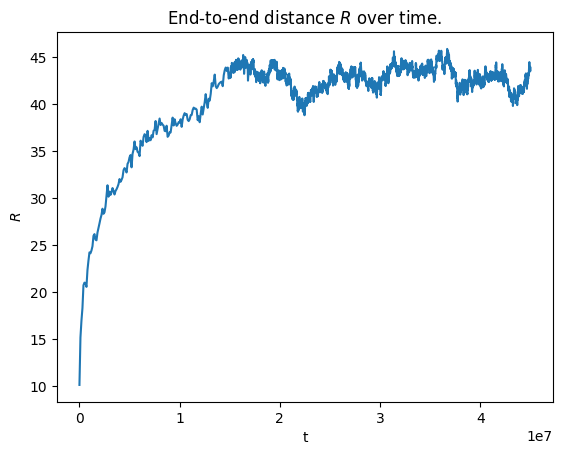

In [18]:
df_ete.groupby("t")["R"].mean().plot(title="End-to-end distance $R$ over time.", ylabel="$R$")

### Change of end-to-end distance over time $g_4$

$g_4(t) = \langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$

In [19]:
df_ete_change = transform.calculate_ete_change_ens_avg_df(df_ete)
df_ete_change

t
0              0.000000
100000       139.322999
200000       218.846959
300000       291.227801
400000       378.282313
               ...     
44960000    2331.529005
44970000    2333.861755
44980000    2317.473739
44990000    2306.665280
45000000    2343.423265
Length: 3151, dtype: float64

<Axes: title={'center': '$\\langle (\\vec{R}(t) - \\vec{R}(0))^2 \\rangle$'}, xlabel='t', ylabel='$\\langle (\\vec{R}(t) - \\vec{R}(0))^2 \\rangle$'>

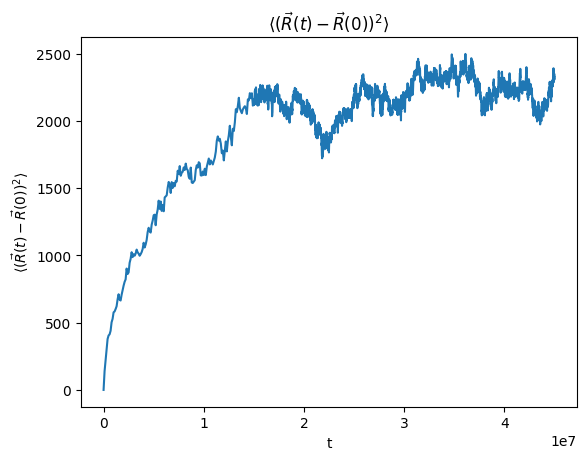

In [20]:
df_ete_change.plot(title=r"$\langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$",
                   ylabel=r"$\langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$")

### Average distance between neighbours $l^2$
$l^2 = \langle (r_k - r_{k-1})^2 \rangle $

In [21]:
l_squared = transform.calculate_neigh_distance_avg_df(df_trajectory_unfolded)
l_squared

0.9418151965719731

## Compare with Rouse Model

In [22]:
df_ete["t/LJ"] = df_ete.index.get_level_values("t").map(lambda x: x * 0.0025)
df_ete

R_x        R_y       R_z          R      t/LJ
molecule-ID t                                                           
1           0         -4.74692  -2.489400  -5.28146   7.524904       0.0
            100000     1.99203  -0.974294  -5.36089   5.801429     250.0
            200000    15.60310  -8.562890 -17.63830  25.057722     500.0
            300000    21.31060  -4.077830 -22.99890  31.618345     750.0
            400000    26.61240 -12.909700 -21.13840  36.355359    1000.0
...                        ...        ...       ...        ...       ...
120         44960000  -9.90820  -2.807960  41.17130  42.439757  112400.0
            44970000 -11.86760  -7.678450  40.55810  42.950646  112425.0
            44980000 -10.26870  -4.398480  39.68700  41.229247  112450.0
            44990000 -10.73070  -0.206313  39.55290  40.983196  112475.0
            45000000  -9.15621   2.439030  40.21040  41.311758  112500.0

[378120 rows x 5 columns]

In [81]:
def rouse_R_sq_avg(t, N: int, b: float, d: int):
    return np.repeat(N * b ** 2 * d, t.shape)


def rouse_R_autocorr(t, p_max: int, N: int, b: float, tau_1: float):
    result = 0
    for p in range(1, p_max):
        if p % 2 == 0:
            continue
        result += 1 / p ** 2 * np.exp(-t * p ** 2 / tau_1)
    return 8 * N * b ** 2 / np.pi ** 2 * result


def rouse_g_4(t, p_max: int, N: int, b: float, tau_1: float, d: int):
    s = 0
    for p in range(1, p_max + 1):
        if p % 2 == 0:
            continue
        s += 1 / p ** 2 * np.exp(-t * p ** 2 / tau_1)
    return 2 * N * b ** 2 * (1 - 8 / np.pi ** 2 * s) * d


N_monomers = 128
b = np.sqrt(l_squared)  # LJ
zeta = 1  # LJ
tau_1 = N_monomers ** 2 * b ** 2 * zeta / (3 * np.pi ** 2)
tau_1

521.1522689106648

In [82]:
df_ete["R^2"] = df_ete["R"]**2
df_ete

R_x        R_y       R_z          R      t/LJ  \
molecule-ID t                                                              
1           0         -4.74692  -2.489400  -5.28146   7.524904       0.0   
            100000     1.99203  -0.974294  -5.36089   5.801429     250.0   
            200000    15.60310  -8.562890 -17.63830  25.057722     500.0   
            300000    21.31060  -4.077830 -22.99890  31.618345     750.0   
            400000    26.61240 -12.909700 -21.13840  36.355359    1000.0   
...                        ...        ...       ...        ...       ...   
120         44960000  -9.90820  -2.807960  41.17130  42.439757  112400.0   
            44970000 -11.86760  -7.678450  40.55810  42.950646  112425.0   
            44980000 -10.26870  -4.398480  39.68700  41.229247  112450.0   
            44990000 -10.73070  -0.206313  39.55290  40.983196  112475.0   
            45000000  -9.15621   2.439030  40.21040  41.311758  112500.0   

                              R^2  
molecule-ID t                      
1           0           56.624182  
            100000      33.656574  
            200000     627.889442  
            300000     999.719771  
            400000    1321.712142  
...                           ...  
120         44960000  1801.133010  
            44970000  1844.758000  
            44980000  1699.850795  
            44990000  1679.622386  
            45000000  1706.661317  

[378120 rows x 6 columns]

In [87]:
df_ete.max()

R_x         81.577700
R_y         86.890000
R_z         94.546800
R           99.727585
t/LJ    112500.000000
R^2       9945.591200
dtype: float64

In [84]:
df_ete_mean = df_ete.groupby("t/LJ")[["R", "R^2"]].mean()
df_ete_mean

,R,R^2
t/LJ,,
0.0,10.149682,118.378714
250.0,15.197520,277.832967
500.0,16.974746,338.184862
750.0,18.327013,400.026892
1000.0,20.738878,493.668185
...,...,...
112400.0,43.783238,2153.312702
112425.0,43.898063,2149.894562
112450.0,43.693770,2133.060138


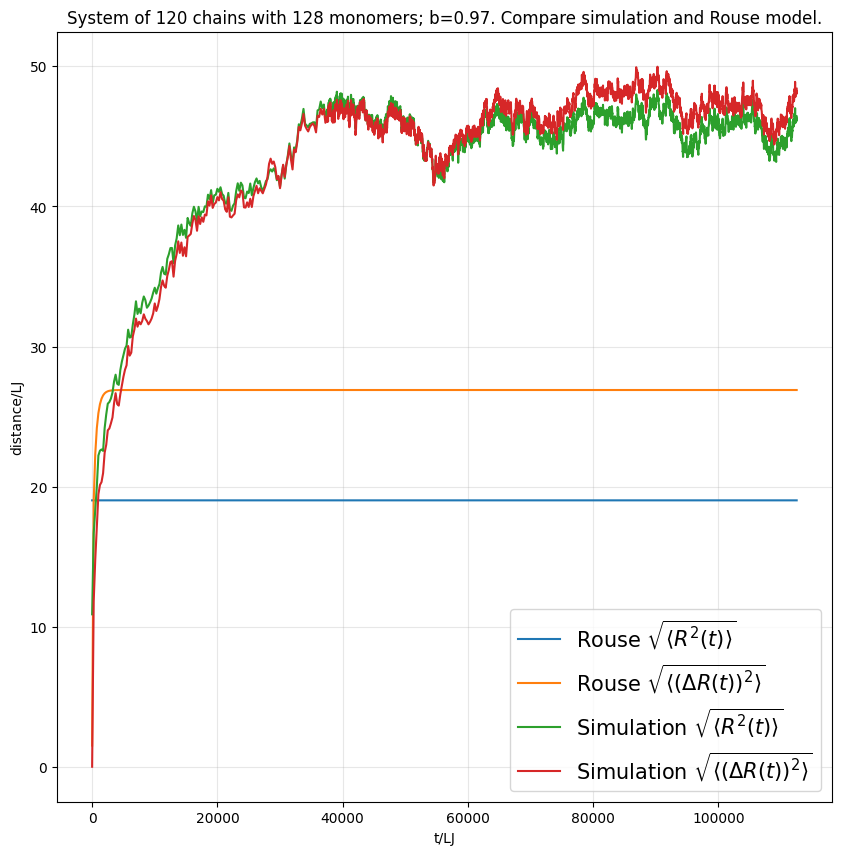

In [86]:
ax: plt.Axes
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(
    df_ete_mean.index,
    np.sqrt(rouse_R_sq_avg(df_ete_mean.index, N=N_monomers, b=b, d=3)),
    label=r"Rouse $ \sqrt{ \langle R^2(t) \rangle } $"
)
ax.plot(
    df_ete_mean.index,
    np.sqrt(rouse_g_4(df_ete_mean.index, N=N_monomers, b=b, tau_1=tau_1, p_max=N_monomers, d=3)),
    label=r"Rouse $ \sqrt{ \langle (\Delta R(t))^2 \rangle } $"
)
ax.plot(
    df_ete_mean.index,
    np.sqrt(df_ete_mean["R^2"]),
    label=r"Simulation $ \sqrt{ \langle R^2(t) \rangle } $"
)
ax.plot(
    df_ete_change.index.get_level_values("t").map(lambda x: x * 0.0025),
    np.sqrt(df_ete_change),
    label=r"Simulation $ \sqrt{ \langle (\Delta R(t))^2 \rangle } $"
)
ax.set_xlabel("t/LJ")
ax.set_ylabel("distance/LJ")
ax.set_title(f"System of 120 chains with {N_monomers} monomers; b={b:.2f}. Compare simulation and Rouse model.")
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)

In [ ]:
df_ete["R^2"] = df_ete["R"]**2
df_ete

In [ ]:
df_ete.groupby("t")["R^2"].mean().plot()